<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr2/blob/main/Abdrakhmanova%20Guzel/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Исследование датасета #1**

1) Датасет небольшой по размеру (579 анкет). Предполагаю, что его нужно будет расширять и дополнять.

2) Сам датасет скачивается файлом в формате xlsx. Так как с ним еще работают и он будет корректироваться, то предлагаю разместить его на гугл доках. Уровень доступа там можно корректировать.

3) Данные в датасете не структурированы и в некоторых случаях заполнены с явными ошибками:
- колонка "Дата отклика" есть даты 03.03.223 и 12.23.23
- колонка "ЗП" содержит суммы в разной валюте (рубли, USD, EUR, KZT, KGS, ...)
- на 8 вакансий всего 11 подходящих анкет (причем эти анкеты только для 4 вакансий)
- какие требования по 8 вакансиям непонятно
- колонку "Город" разделить на колонки с городом/страной и колонкой/ами по готовности к командировкам и командировкам
- у части анкет нет ответа в колонке "Подходит - да/нет"
- в таблице нет колонок "Ключевые навыки", "Обо мне" (в ТЗ они упоминаются)

4) Необходимы критерии по всем 8 вакансиям



**Загрузка таблицы**

Загрузила файл "dataset2.csv" в колаб

In [ ]:
import pandas as pd

In [ ]:
import chardet

enc = chardet.detect(open("dataset2.xlsx", 'rb').read())

print(enc)

{'encoding': None, 'confidence': 0.0, 'language': None}


In [ ]:
data = pd.read_excel("dataset2.xlsx")
print(data.shape)
data.info()
data.head()

(579, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  579 non-null    int64 
 1   Дата отклика                                579 non-null    object
 2   Пол, возраст                                579 non-null    object
 3   ЗП                                          579 non-null    object
 4   Ищет работу на должность                    579 non-null    object
 5   Город                                       579 non-null    object
 6   Занятость                                   579 non-null    object
 7   График                                      579 non-null    object
 8   Опыт ()                                     579 non-null    object
 9   Последнее/нынешное место работы             579 non-null    object
 10  Последняя/нынешн

,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования\nИсследование рынка...,NaN,Анализ рынка\nУправление проектами\nProduct Ma...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...,NaN,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


**Обработка датасета**

In [ ]:
#Удаляем лишнее
data.dropna(axis=0, how='any')
data.drop(["Unnamed: 0", "Дата отклика", "Обновление резюме"], axis=1, inplace=True)
print(data.shape)

(579, 14)


In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Пол, возраст                                579 non-null    object
 1   ЗП                                          579 non-null    object
 2   Ищет работу на должность                    579 non-null    object
 3   Город                                       579 non-null    object
 4   Занятость                                   579 non-null    object
 5   График                                      579 non-null    object
 6   Опыт ()                                     579 non-null    object
 7   Последнее/нынешное место работы             579 non-null    object
 8   Последняя/нынешняя должность                579 non-null    object
 9   Выполняемые задачи на прошлых местах работ  552 non-null    object
 10  Обо мне                   

,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Подходит - да/нет
0,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования\nИсследование рынка...,NaN,Анализ рынка\nУправление проектами\nProduct Ma...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",да
1,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...,NaN,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",да
2,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,"Высшее, 2013, Санкт-Петербургский государствен...",да
3,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,"Магистр, 2014, Московский государственный техн...",да
4,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,"Высшее, 2021, Российская академия народного хо...",да


In [ ]:
# Убираем кодировку ASCII (\xa0 - неразрывный пробел, \n - перенос строки) в текстовых строках
for i in range(data.shape[1]):
  for j in range(data.shape[0]):
    if isinstance(data.values[j][i], (int, float)) == False:
       data.values[j][i] = data.values[j][i].replace("\xa0", " ")
       data.values[j][i] = data.values[j][i].replace("\n", " ")

data.head()

,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Подходит - да/нет
0,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования Исследование рынка;...,NaN,Анализ рынка Управление проектами Product Mana...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",да
1,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста В2В Задачи: - Развити...,NaN,Самомотивация Таймменеджмент Креативность Чувс...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",да
2,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда Планирование маркетинговых ...,"Высшее, 2013, Санкт-Петербургский государствен...",да
3,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка 2. Определение целевой а...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами Организаторские навыки Пр...,"Магистр, 2014, Московский государственный техн...",да
4,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Переговоры со стейкхолдером - Составление ТЗ,...",Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом Заключение договоров Ана...,"Высшее, 2021, Российская академия народного хо...",да


In [ ]:
# Копию делаем. Бекапы - это обязательно.
data2 = data.copy()

**Пол** 0/1 (1 - мужчина, 0 - женщина)

**Возраст** **ОНЕ на 8** (не указан - 0, от 1 до 17, от 18 до 24, от 25 до 35, от 36 до 44, от 45 до 59, от 60 до 74, от 75 и старше)  [0 0 0 0 0 1 0 0] (в колонке "Пол, возраст", *возраст может быть не указан*)

**ЗП** **ОНЕ на 8** (не указан или 1, от 2 до 20000, от 20001 до 30000, от 30001 до 50000, от 50001 до 80000, от 80001 до 150000, от 150001 до 300000, от 300001 и выше) (переводить валюту в рубли) [0 0 0 0 0 1 0 0]  (*может быть не указана*)

**Ищет должность OHE на 8** (Growth Product Manager, HR-специалист, Product manager в Growth Hacking команду, Product Manager в команду HR, Product Manager в команду Финансового департамента, Product Marketing Manager в Growth Hacking команду, Project manager, Директор медицинской клиники) [0 0 0 0 0 1 0 0]

**Город** **ОНЕ на 5** (Москва, Санкт-Петербург, Уфа, города-миллионники(Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Красноярск Пермь Воронеж Волгоград), все остальные страны и города) [0 0 1 0 0]

**Готовность к переезду, командировкам Multi(2x)** (готова к переезду/готов к переезду, готова к командировкам/готов к командировкам) (в колонке "Город", может быть не указан)

**Занятость Multi(6x)** (стажировка, волонтерство, проектная работа, частичная занятость, неполный рабочий день, полная занятость)

**График Multi(5x)** (вахтовый метод, удаленная работа, гибкий график, полный день, сменный график)

**Опыт ОНЕ на 11** [0 0 0 0 0 1 0 0 0 0 0] (0 - 6 месяцев, 7 - 12 месяцев, 13 - 24 месяцев, 25 - 36 месяцев, 37 - 60 месяцев, 61 - 96 месяцев, 97 - 120 месяцев, 121 - 156 месяцев, 157 - 192 месяцев, 193 - 240 месяцев, больше 240 месяцев)

Последнее место работы BagofWords(10)

Последняя должность BagofWords(10)

**Образование и ВУЗ ОНЕ на 10** (Бакалавр;Высшее;Среднее специальное;Неоконченное высшее;Среднее;Среднее образование;Среднее специальное;Доктор наук;
Кандидат наук;Магистр)

**Подходит** 0/1 (1 - да, 0 - нет)

Разделю на 8 категорий:

In [ ]:
import datetime
import re
from tensorflow.keras import utils #Используем для to_categoricall

In [ ]:
# Функции для пола и возраста
def func_gender(arg):
  if "M" in arg:
    return 1
  else:
    return 0

def func_age(arg):
  phrase_split = arg.split(",")
  if len(phrase_split) > 1:
    year = int(re.findall(r'\d+', phrase_split[1])[0])
  else:
    year = 0
  return year

# Функция определения категории возраста
def func_age_ohe(arg):
  out = func_age(arg)
  if out == 0:
    age_vector = 0
  elif 1 <= out <= 17:
    age_vector = 1
  elif 18 <= out <= 24:
    age_vector = 2
  elif 25 <= out <= 35:
    age_vector = 3
  elif 36 <= out <= 44:
    age_vector = 4
  elif 45 <= out <= 59:
    age_vector = 5
  elif 60 <= out <= 74:
    age_vector = 6
  else:
    age_vector = 7

  return list(utils.to_categorical(age_vector, 8).astype('int'))


In [ ]:
# Зарплата
def func_salary(arg):
  num = arg
  # Убираем лишние знаки, получаем число
  if (type(num) == str):
    num = re.sub(' ','',num)
    num = re.sub('[а-яА-ЯёЁ]','',num)
    num = re.sub('[a-zA-Z]','',num)
    num = num.replace('.','')
    if num == "не указана":
      num = 1

  # Убираем цифры, получаем в какой валюте
    curr = re.sub('[0-9]','',arg)
    curr = curr.replace('.','').strip()
    if num == "не указана":
      curr == "руб"

  # Конвертируем в рубли, если валюта
    if curr == 'USD':
      num = float(num)*80
    elif curr == 'KZT':
      num = float(num)*0.18
    elif curr=='грн':
      num = float(num)*2.2
    elif curr=='UAH':
      num = float(num)*2.2
    elif curr=='белруб':
      num = float(num)*27.4
    elif curr=='BYN':
      num = float(num)*27.4
    elif curr=='EUR':
      num = float(num)*86
    elif curr=='KGS':
      num = float(num)*0.92
    elif curr=='сум':
      num = float(num)*0.007
    elif curr=='AZN':
      num = float(num)*47
    else:
      num = 1
      curr = "руб"

    salary = int(num)

    return salary

# Функция определения категории зарплаты
def func_salary_ohe(arg):
  if arg == 1:
    salary_vector = 0
  elif 2 <= arg <= 20000:
    salary_vector = 1
  elif 20001 <= arg <= 30000:
    salary_vector = 2
  elif 30001 <= arg <= 50000:
    salary_vector = 3
  elif 50001 <= arg <= 80000:
    salary_vector = 4
  elif 80001 <= arg <= 150000:
    salary_vector = 5
  elif 150001 <= arg <= 300000:
    salary_vector = 6
  else:
    salary_vector = 7

  return list(utils.to_categorical(salary_vector, 8).astype('int'))

In [ ]:
# Должность
def func_vacancy(arg):
  if arg == "Growth Product Manager":
    vacancy_vector = 0
  elif arg == "HR-специалист":
    vacancy_vector = 1
  elif arg == "Product manager в Growth Hacking команду":
    vacancy_vector = 2
  elif arg == "Product Manager в команду HR":
    vacancy_vector = 3
  elif arg == "Product Manager в команду Финансового департамента":
    vacancy_vector = 4
  elif arg == "Product Marketing Manager в Growth Hacking команду":
    vacancy_vector = 5
  elif arg == "Project manager":
    vacancy_vector = 6
  elif arg == "Директор медицинской клиники":
    vacancy_vector = 7
  else:
    vacancy_vector = 2

  return list(utils.to_categorical(vacancy_vector, 8).astype('int'))

# Город
def func_city(arg):
  millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Красноярск Пермь Воронеж Волгоград"
  sarg=arg.split(',')
  for item in sarg:
    item= item.strip()
    if item == "Москва":          return [1, 0, 0, 0, 0]
    if item == "Санкт-Петербург": return [0, 1, 0, 0, 0]
    if item == "Уфа":             return [0, 0, 1, 0, 0]
    if item in millionCities:     return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

# Переезд и командировки
def func_relocation(arg):
  sarg=arg.lower()
  out= [0, 0]
  if ("готова к переезду" or "готов к переезду" or "хочу переехать" in arg):     out[0]=1
  if ("готова к командировкам" or "готов к командировкам" in arg):               out[1]=1
  return out

# Занятость
def func_employment(arg):
  out= [0, 0, 0, 0, 0, 0]
  if ("стажировка" in arg):             out[0]=1
  if ("волонтерство" in arg):           out[1]=1
  if ("проектная работа" in arg):       out[2]=1
  if ("частичная занятость" in arg):    out[3]=1
  if ("неполный рабочий день" in arg):  out[4]=1
  if ("полная занятость" in arg):       out[5]=1
  return out

# График работы
def func_working_schedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("вахтовый метод" in arg):    out[0]=1
  if ("удаленная работа" in arg):  out[1]=1
  if ("гибкий график" in arg):     out[2]=1
  if ("полный день" in arg):       out[3]=1
  if ("сменный график" in arg):    out[4]=1
  return out

# Данные об образовании
def func_education(arg):
  out = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #По умолчанию не указано
  if "Бакалавр" in arg:             out[0] = 1
  if "Высшее" in arg:               out[0] = 1
  if "Среднее специальное" in arg:  out[0] = 1
  if "Неоконченное высшее" in arg:  out[0] = 1
  if "Среднее" in arg:              out[0] = 1
  if "Среднее образование" in arg:  out[0] = 1
  if "Среднее специальное" in arg:  out[0] = 1
  if "Доктор наук" in arg:          out[1] = 1
  if "Кандидат наук" in arg:        out[2] = 1
  if "Магистр" in arg:              out[3] = 1

  return out


In [ ]:
# Данные об опыте работы
def func_work_experience(arg):
  arg = arg.replace("—", '')
  month_key = ['месяц', 'месяцев', 'месяца']
  year_key = ['год', 'лет', 'года']

  if arg == 'Не указано' or pd.isnull(arg):
    return 0

  args_split = arg.split(' ')[:6]
  month = 0
  year = 0
  for i in range(len(args_split)):
      if args_split[i] in month_key:
           month = args_split[i-1]
      if args_split[i] in year_key:
          year = args_split[i-1]
  return abs(int(year))*12 + abs(int(month))

# Категориальное представление опыта работы
def func_work_experience_vector(arg):
  out = func_work_experience(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9
  if (out > 240): # если больше 240 месяцев
    outClass = 10

  return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
def func_final_result(arg):
  if "да" or "Да" in arg:
    return 1
  else:
    return 0

In [ ]:
print(data2.values)

[['Женщина' '90 000 руб.' 'Growth Product Manager' ...
  'Анализ рынка Управление проектами Product Management Проведение презентаций Навыки продаж Декомпозици Вывод продукта на рынок Custbev'
  'Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва'
  'да']
 ['Женщина' 'не указана' 'Growth Product Manager' ...
  'Самомотивация Таймменеджмент Креативность Чувство юмора Adobe Photoshop Adobe Illustrator Adobe InDesign Figma Trello Многозадачность Аналитическое мышление'
  'Высшее, 2022, GeekBrains, 2010, Московский художественно-промышленный институт, Москва'
  'да']
 ['Мужчина, 33 года, родился 23 августа 1989' '150 000 руб.'
  'Growth Product Manager' ...
  'Продвижение бренда Планирование маркетинговых кампаний Маркетинговые исследования Управление проектами Управление командой Стратегический маркетинг Ценовая политика Клиентоориентированность Бренд-менеджмент Запуск нового бренда Позиционирование бренда'
  'Высшее, 2013, Санкт-Петербургский государствен

In [ ]:
print(len(data2.values))
print(data2.values[0])

579
['Женщина' '90 000 руб.' 'Growth Product Manager'
 'Индонезия, Не готова к переезду, не готова к командировкам'
 'проектная работа, частичная занятость, полная занятость'
 'удаленная работа' 'Опыт работы —5 лет 10 месяцев' 'PT MYBALI APP GROUP'
 'Менеджер по продукту'
 'Маркетинговые исследования Исследование рынка; Исследование конкурентов; Исследование потребителей; Планирование рекламы. Виды исследований: Опросы; Фокус-группы; Глубинные интервью; Эксперименты, полевые исследования. Задачи в рамках исследования потребителей: Анализ потребительских трендов; Анализ обратной связи от клиентов; Сегментация аудитории; Составление портрета целевой аудитории. Реклама у лидеров мнений Организация и контроль взаимодействия с лидерами мнений (селебрити, блогеры). Опыт организации коллабораций. SMM и комьюнити-менеджмент Планирование продвижения; Создание и контроль контента; Наполнение аккаунтов, сообществ; Модерирование и развитие аккаунтов, сообществ. Социальные сети: Telegram. Прямая ре

In [ ]:
# Обработка текстовых данных
def func_text1(arg):
  spisok = []

  for i in range(len(arg)):
    print(i)
    spisok_text = ""
    for val in range(len(arg[i])):
      print(val)
      if (arg[i][val] != "" or arg[i][val] != "nan") and (val == 7 or val == 8 or val == 9 or val == 10 or val == 11):
        spisok_text += arg[i][val] + ", "
        print(spisok_text)
    spisok.append(spisok_text)

  spisok = np.array(spisok)

  return spisok

spisok_words = func_text1(data2.values)



0
0
1
2
3
4
5
6
7
PT MYBALI APP GROUP, 
8
PT MYBALI APP GROUP, Менеджер по продукту, 
9
PT MYBALI APP GROUP, Менеджер по продукту, Маркетинговые исследования Исследование рынка; Исследование конкурентов; Исследование потребителей; Планирование рекламы. Виды исследований: Опросы; Фокус-группы; Глубинные интервью; Эксперименты, полевые исследования. Задачи в рамках исследования потребителей: Анализ потребительских трендов; Анализ обратной связи от клиентов; Сегментация аудитории; Составление портрета целевой аудитории. Реклама у лидеров мнений Организация и контроль взаимодействия с лидерами мнений (селебрити, блогеры). Опыт организации коллабораций. SMM и комьюнити-менеджмент Планирование продвижения; Создание и контроль контента; Наполнение аккаунтов, сообществ; Модерирование и развитие аккаунтов, сообществ. Социальные сети: Telegram. Прямая реклама Разработка программ лояльности.Составление и тестирование гипотез. Анализ конкурентов. Изучение потребностей потребителя ( касдев, проведе

TypeError: ignored

In [ ]:
# Извлекаем все параметры
def getAllParameters(val):
  gender = func_gender(val[0])  #параметры о поле
  age = func_age_ohe(val[0]) #параметры о возрасте
  salary = func_salary_ohe(func_salary(val[1])) #параметры о зарплате
  vacancy = func_vacancy(val[2]) #параметры о должности
  city = func_city(val[3]) #параметры о городе
  relocation = func_relocation(val[3]) #параметры о переездах и командировках
  employment = func_employment(val[4]) #параметры о желаемой занятости
  shedule = func_working_schedule(val[5]) #параметры о желаемом графике
  work_experience = func_work_experience_vector(val[6]) #параметры об опыте
  education = func_education(val[12]) #параметры об образовании
  # out_text = ""
  # out_text += val[7] + " " + val[8] + " " + val[9] + " " + val[10] + " " + val[11]
  # text = func_text(out_text)
  out = []

# Склеиваем все параметры в вектор
  out.append(gender)
  out += age
  out += salary
  out += vacancy
  out += city
  out += relocation
  out += employment
  out += shedule
  out += work_experience
  out += education
  # out += text

  return out


In [ ]:
print(getAllParameters(data2.values[0]))


[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import numpy as np # Библиотека работы с массивами

# Создаем тренировочную выборку
def training_sample(values):
  xTrain = []
  yTrain = []

  for val in range(len(data2.values)):
    y = func_final_result(data2.values[13])
    x = getAllParameters(data2.values[val])
    xTrain.append(x)
    yTrain.append(y)

  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)


  return (xTrain, yTrain)

In [ ]:
import tensorflow as tf

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt

In [ ]:
(xTrain, yTrain) = training_sample(data2.values) # Извлекаем значения загруженного набора данных

x_train, x_test, y_train, y_test = train_test_split(xTrain, yTrain, test_size=0.2)
#Выводим результирующие размеры таблиц
print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)
# Пример обработанных данных
n = 0
print(x_train[n])
print(y_train[n])

Train: (463, 64) (463,)
Test: (116, 64) (116,)
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
1


In [ ]:
def create_model():

    # Создание модели
    model = Sequential()

    # Добавление слоев
    model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(20))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция и возврат модели
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

def fit_model(arg):
  # Обучение нейронной сети
  history = arg.fit(x_train,    # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=50,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

  return history


In [ ]:
model = create_model()

history = fit_model(model)

Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 0.2900 - accuracy: 1.0000 - val_loss: 0.1743 - val_accuracy: 1.0000
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 1.0000
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 8/50
47/47 [==

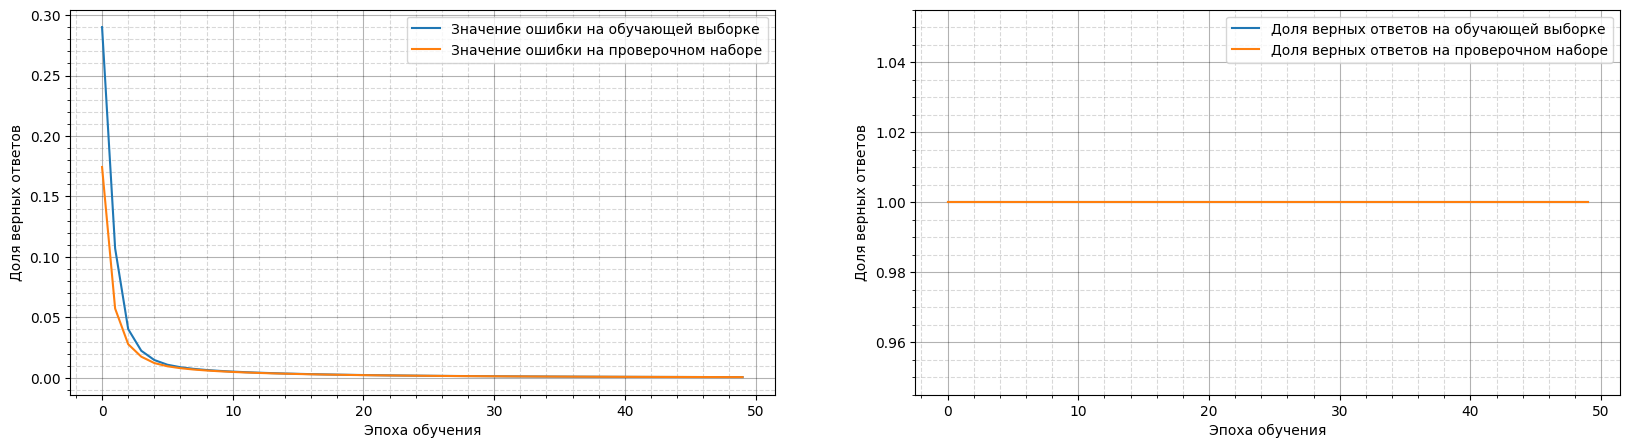

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Значение ошибки на обучающей выборке')
plt.plot(history.history['val_loss'], label = 'Значение ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid(which = "major", color = "black", alpha = 0.3)
plt.minorticks_on()
plt.grid(which = "minor", color = "gray", linestyle = "--", alpha = 0.3)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid(which = "major", color = "black", alpha = 0.3)
plt.minorticks_on()
plt.grid(which = "minor", color = "gray", linestyle = "--", alpha = 0.3)

plt.show()


In [ ]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

4/4 [==============================] - 0s 4ms/step - loss: 5.4846e-04 - accuracy: 1.0000
